In [1]:
# import some keras and basic module 

from __future__ import print_function 
import tensorflow.keras as keras
import tensorflow as tf
# data set cifar 10 
from tensorflow.keras.datasets import cifar10 

# basic preprocesssing for image data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct neural network 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 

from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os 

import numpy as np 

import matplotlib.pyplot as plt

import tensorflow as tf 

config = tf.ConfigProto()
tf.enable_eager_execution(config=config)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:

## basic parameters 
batch_size = 32 
num_classes = 10 
num_epochs = 200 
is_data_augmentation = False 
model_dir = 'models'
model_filename = 'LeNet5_3_activation_function.h1'



In [3]:
#read data and split data into train and test set

(train_set,train_label),(test_set,test_label) = cifar10.load_data() 

print('the shape of training data set is: ',train_set.shape) 

# print number of train and test samples 

# train samples 50000
#print(train_set.shape[0] , 'train samples') 

# test samples 10000
#print(test_set.shape[0] , 'test samples') 

#print(train_label)

the shape of training data set is:  (50000, 32, 32, 3)


In [4]:
# Convert class label to binary vector 
train_label = keras.utils.to_categorical(train_label,num_classes)
test_label  = keras.utils.to_categorical(test_label,num_classes) 
print(train_label.shape)
print(test_label.shape)

(50000, 10)
(10000, 10)


the code input for Conv2D 
```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```

In [5]:
# construct the model 

cnn_model = Sequential() 


# convolutional layer stride 1 no padding nfilters = 6 input_shape = 32*32*3
# acitvation = softmax
cnn_model.add(Conv2D(6,(5,5),padding='valid',input_shape=train_set.shape[1:], ))
cnn_model.add(Activation('tanh'))

# max-pooling layer window size 2*2
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

# convolutional layer stride 1 no padding nfilters = 6 input_shape = 14*14*6
# activation = softmax
cnn_model.add(Conv2D(16,(5,5),padding ='valid'))
cnn_model.add(Activation('tanh'))

# max-pooling layer window size 2*2
cnn_model.add(MaxPooling2D(pool_size =(2,2) ))

# flatten 2d to 1d 
cnn_model.add(Flatten())


# full connected layer nfilters = 120 

cnn_model.add(Dense(120,activation = 'tanh' )) 

# full connected layer nfilters = 84 
cnn_model.add(Dense(84, activation = 'tanh'))

# last full connected layer nfilters = 10 
cnn_model.add(Dense(10 , activation = 'softmax'))



In [6]:


# initialization of optimizer 
opt = keras.optimizers.RMSprop(learning_rate = 0.0001,decay = 1e-6)

# train the model by optimizer
cnn_model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

train_set = train_set.astype('float32')
test_set = test_set.astype('float32') 

train_set /= 255 
test_set /= 255 

if not is_data_augmentation:
    print('Not using data augmentation.')
    cnn_history = cnn_model.fit(train_set, train_label,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(test_set, test_label),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    augument_data_set = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        zca_epsilon=1e-06,                    # epsilon for ZCA whitening
        rotation_range=0,                     # randomly rotate images in the range (degrees, 0 to 180)
        
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
        
    # compute quantities required for feature-wise normalization 
    # (std, mean ,and pricipal components if ZCA whitening is applied)
    augument_data_set.fit(train_set) 
    
    
    # Fit the model on the batches generated by augument_data_set.flow() 
    
    cnn_model.fit_generator(augument_data_set.flow(train_set,train_label ,
                                                  batch_size=batch_size),
                           epochs = num_epochs, 
                           validation_data = (test_set,test_label),
                           workers = 4 )
    
# save model and weights 
if not os.path.isdir(model_dir): 
    os.makedirs(model_dir) 
model_path = os.path.join(model_dir,model_filename)
cnn_model.save(model_path)
print("CNN Model saved at %s " % model_path)

# Score trained model 

test_loss_value, test_metric_value = cnn_model.evaluate(test_set,test_label,verbose =1 )
train_loss_value, train_metric_value = cnn_model.evaluate(train_set,train_label,verbose =1)


print("Train loss: ", train_loss_value) 
print("Trian metric: ", train_metric_value)

print("Test loss: ", test_loss_value)
print("Test accuracy:", test_metric_value)
print(cnn_history.history)


Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
50000/50000 [==============================] - 9s 172us/sample - loss: 1.9204 - acc: 0.3156 - val_loss: 1.7368 - val_acc: 0.3877
Epoch 2/200
50000/50000 [==============================] - 7s 142us/sample - loss: 1.6683 - acc: 0.4091 - val_loss: 1.6260 - val_acc: 0.4238
Epoch 3/200
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5719 - acc: 0.4432 - val_loss: 1.5309 - val_acc: 0.4576
Epoch 4/200
50000/50000 [==============================] - 7s 140us/sample - loss: 1.4994 - acc: 0.4692 - val_loss: 1.4744 - val_acc: 0.4754
Epoch 5/200
50000/50000 [==============================] - 7s 136us/sample - loss: 1.4420 - acc: 0.4925 - val_loss: 1.4162 - val_acc: 0.4932
Epoch 6/200
50000/50000 [==============================] - 7s 135us/sample - loss: 1.3968 - acc: 0.5083 - val_loss: 1.3833

Epoch 56/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8736 - acc: 0.6950 - val_loss: 1.0736 - val_acc: 0.6327
Epoch 57/200
50000/50000 [==============================] - 7s 135us/sample - loss: 0.8682 - acc: 0.6977 - val_loss: 1.0604 - val_acc: 0.6333
Epoch 58/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8624 - acc: 0.6996 - val_loss: 1.0636 - val_acc: 0.6316
Epoch 59/200
50000/50000 [==============================] - 7s 135us/sample - loss: 0.8578 - acc: 0.7015 - val_loss: 1.0599 - val_acc: 0.6342
Epoch 60/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8528 - acc: 0.7012 - val_loss: 1.0774 - val_acc: 0.6286
Epoch 61/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8481 - acc: 0.7040 - val_loss: 1.0674 - val_acc: 0.6337
Epoch 62/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8430 - acc: 0.7072 - val_loss: 1.0766 - val_acc: 0.6283
Epoch 

50000/50000 [==============================] - 7s 136us/sample - loss: 0.6386 - acc: 0.7810 - val_loss: 1.1175 - val_acc: 0.6339
Epoch 114/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.6349 - acc: 0.7830 - val_loss: 1.1279 - val_acc: 0.6291
Epoch 115/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.6328 - acc: 0.7824 - val_loss: 1.1338 - val_acc: 0.6321
Epoch 116/200
50000/50000 [==============================] - 7s 137us/sample - loss: 0.6290 - acc: 0.7857 - val_loss: 1.1301 - val_acc: 0.6315
Epoch 117/200
50000/50000 [==============================] - 7s 136us/sample - loss: 0.6259 - acc: 0.7878 - val_loss: 1.1286 - val_acc: 0.6346
Epoch 118/200
50000/50000 [==============================] - 7s 137us/sample - loss: 0.6223 - acc: 0.7884 - val_loss: 1.1346 - val_acc: 0.6341
Epoch 119/200
50000/50000 [==============================] - 7s 145us/sample - loss: 0.6184 - acc: 0.7888 - val_loss: 1.1271 - val_acc: 0.6362
Epoch 120/200

50000/50000 [==============================] - 7s 131us/sample - loss: 0.4595 - acc: 0.8481 - val_loss: 1.3143 - val_acc: 0.6246
Epoch 171/200
50000/50000 [==============================] - 7s 130us/sample - loss: 0.4571 - acc: 0.8501 - val_loss: 1.3171 - val_acc: 0.6252
Epoch 172/200
50000/50000 [==============================] - 7s 131us/sample - loss: 0.4548 - acc: 0.8512 - val_loss: 1.3133 - val_acc: 0.6247
Epoch 173/200
50000/50000 [==============================] - 6s 129us/sample - loss: 0.4515 - acc: 0.8520 - val_loss: 1.3124 - val_acc: 0.6282
Epoch 174/200
50000/50000 [==============================] - 7s 133us/sample - loss: 0.4481 - acc: 0.8554 - val_loss: 1.3179 - val_acc: 0.6289
Epoch 175/200
50000/50000 [==============================] - 7s 133us/sample - loss: 0.4452 - acc: 0.8562 - val_loss: 1.3239 - val_acc: 0.6247
Epoch 176/200
50000/50000 [==============================] - 7s 130us/sample - loss: 0.4430 - acc: 0.8554 - val_loss: 1.3257 - val_acc: 0.6273
Epoch 177/200

max train accuracy 0.87984
max test accuracy 0.6425


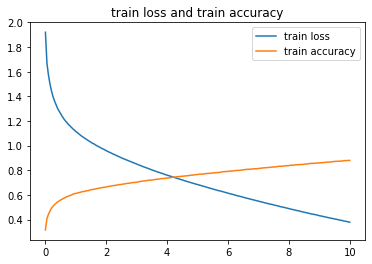

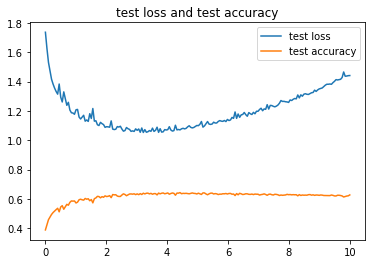

In [8]:

# get history data
epoth_x = np.linspace(0, 10, num_epochs, endpoint=True)
train_loss = cnn_history.history['loss']
train_accuracy = cnn_history.history['acc']
test_loss = cnn_history.history['val_loss']
test_accuracy = cnn_history.history['val_acc']

# plot train loss and accuracy
plt.figure() 
plt.plot(epoth_x, train_loss,label = 'train loss')
plt.plot(epoth_x,train_accuracy,label = 'train accuracy')
plt.title("train loss and train accuracy")
plt.legend()


# plot test loss and accuracy
plt.figure() 
plt.plot(epoth_x, test_loss, label = 'test loss')
plt.plot(epoth_x,test_accuracy, label = 'test accuracy')
plt.legend()
plt.title("test loss and test accuracy")

# get max train accuracy and test accuracy 
max_train_accuracy = np.max(cnn_history.history['acc'])
max_test_accuracy = np.max(cnn_history.history['val_acc'])
print("max train accuracy", max_train_accuracy)
print("max test accuracy", max_test_accuracy)